In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
def get_lambda(i):
    return 10 ** (-3 + 0.2 * i)

In [87]:
df = pd.read_csv('data/longley.csv')

In [88]:
df.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
0,83.0,234.289,235.6,159.0,107.608,1947,60.323
1,88.5,259.426,232.5,145.6,108.632,1948,61.122
2,88.2,258.054,368.2,161.6,109.773,1949,60.171
3,89.5,284.599,335.1,165.0,110.929,1950,61.187
4,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [89]:
df = df.drop('Population', axis=1)

In [90]:
df.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Year,Employed
0,83.0,234.289,235.6,159.0,1947,60.323
1,88.5,259.426,232.5,145.6,1948,61.122
2,88.2,258.054,368.2,161.6,1949,60.171
3,89.5,284.599,335.1,165.0,1950,61.187
4,96.2,328.975,209.9,309.9,1951,63.221


In [91]:
from sklearn.model_selection import train_test_split
X, y = df.drop('Employed', axis=1), df['Employed']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [93]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error

In [94]:
scores_test = []
scores_train = []
for i in range(26):
    model = Ridge(alpha=get_lambda(i))
    linear = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores_train.append(mean_squared_error(y_train, model.predict(X_train)))
    scores_test.append(mean_squared_error(y_test, y_pred))

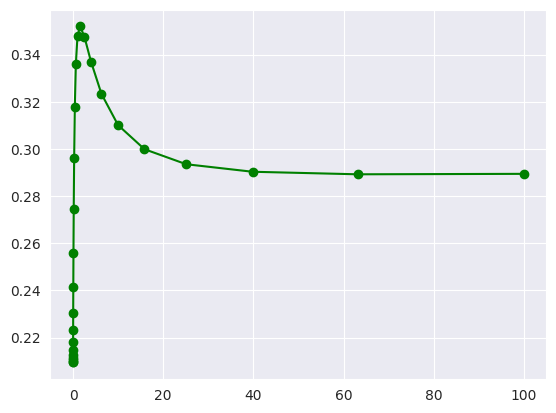

In [95]:
plt.plot([get_lambda(i) for i in range(26)],scores_test, color='green', marker='o')


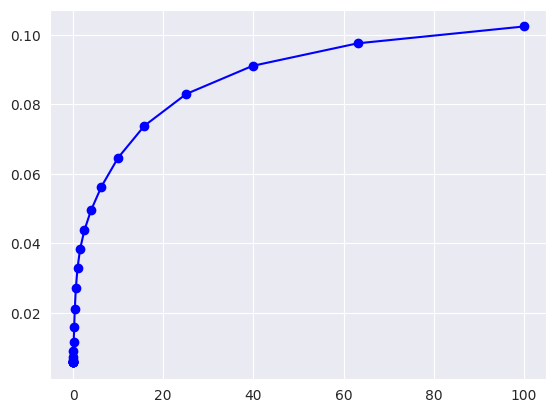

In [96]:
plt.plot([get_lambda(i) for i in range(26)],scores_train,  color='blue', marker='o')

In [97]:
model = LinearRegression()
model.fit(X_train, y_train)
mean_squared_error(y_test, model.predict(X_test)), mean_squared_error(y_train, model.predict(X_train))

(0.20886527605278238, 0.005802099829833704)